In [1]:
import os

# selenuim 4
from selenium import webdriver
from selenium.webdriver.common.by import By

import time
#from selenium.webdriver.chrome.service import Service as ChromeService
#from webdriver_manager.chrome import ChromeDriverManager

In [2]:
s1= (1,2,3,4,5)
for i, elem in enumerate(s1):
    print(i,elem)

0 1
1 2
2 3
3 4
4 5


In [2]:
from PIL import Image

In [50]:
import os

# selenuim 4
from selenium import webdriver
from selenium.webdriver.common.by import By

import time
#from selenium.webdriver.chrome.service import Service as ChromeService
#from webdriver_manager.chrome import ChromeDriverManager

import requests
import io
from PIL import Image

def get_urls(query: str, delay: int) ->set:
    images_urls= set()
    browser= webdriver.Chrome()
    browser.get('https://images.google.com/')
    search_box= browser.find_element(By.CSS_SELECTOR, '#APjFqb.gLFyf')
    search_box.send_keys(query)
    search_box.submit()

    time.sleep(delay)
    browser.execute_script('window.scrollTo(0, document.body.scrollHeight);')
    time.sleep(delay)
    browser.execute_script('window.scrollTo(0, document.body.scrollHeight);')
    time.sleep(delay)
    browser.execute_script('window.scrollTo(0, document.body.scrollHeight);')
    thumbnails = browser.find_elements(By.CLASS_NAME, "Q4LuWd")
    for img in thumbnails:
        try:
            img.click()
            time.sleep(1)
        except:
            continue
        images= browser.find_elements(By.CLASS_NAME,"iPVvYb")
        for image in images:
          if image.get_attribute('src') and 'http' in image.get_attribute('src'):
             images_urls.add(image.get_attribute('src'))

    return images_urls

In [43]:
ans= get_urls('narendra modi', 2)

In [44]:
print(ans)

{'https://images.news18.com/ibnlive/uploads/2022/05/pm-modi-4-16538967554x3.jpg', 'https://www.livemint.com/lm-img/img/2023/07/13/600x338/Prime-Minister-Narendra-Modi---REUTERS-_1689228183057_1689228191022.jpg', 'https://gumlet.assettype.com/swarajya%2F2023-01%2F6ecb494c-77e0-4064-b404-9a84087a8c58%2FNarendra_Modi_2_2.jpg?q=75&auto=format%2Ccompress&w=400&dpr=2.6', 'https://images.moneycontrol.com/static-mcnews/2019/02/Narendra-modi-770x433.jpg?impolicy=website&width=770&height=431', 'https://images.newindianexpress.com/uploads/user/imagelibrary/2023/7/5/w1200X800/Narendra_Modi.jpg', 'https://etimg.etb2bimg.com/photo/96493840.cms', 'https://m.media-amazon.com/images/I/81Y9N97S6gL._AC_UF894,1000_QL80_.jpg', 'https://c.ndtvimg.com/2023-05/4vajgd1o_narendra-modi-ani_625x300_13_May_23.jpg?im=Resize=(1230,900)', 'https://cdn.dnaindia.com/sites/default/files/2023/01/18/2567115-2564286-pm-modi.jpg?im=FitAndFill=(1200,900)', 'https://images.mid-day.com/images/images/2023/feb/Narendra-Modi-AFP_

In [53]:
def download_images(query, delay, no_of_images):
    image_urls= get_urls(query, delay)
    try:
        if image_urls is not None:
            os.makedirs(query, exist_ok=True)
            for i, url in enumerate(image_urls):
                if i==no_of_images:
                   break
                image_content= requests.get(url).content
                image_file=  io.BytesIO(image_content)
                image= Image.open(image_file)
                file_path= os.path.join(os.path.curdir, query, str(i)+ ".jpg")
                
                with open(file_path, 'wb') as f:
                   image.save(f, "JPEG")
            return 'images download successfully'
        else:
            return "No Images found"
    except Exception as e:
        pass

In [57]:
download_images('barak obama', 2,40)

In [ ]:
import os

In [6]:
import numpy as np
import base64
import cv2
import sklearn
from PIL import Image
from io import BytesIO

In [43]:
pwd

'c:\\Users\\admin\\Desktop\\Image_Classification'

In [44]:
def get_cv2_image_from_base64_string(b64str):
    '''
    credit: https://stackoverflow.com/questions/33754935/read-a-base-64-encoded-image-from-memory-using-opencv-python-library
    :param uri:
    :return:
    '''
    # Decode the base64 string to bytes
    image_bytes = base64.b64decode(b64str)

    # Convert the bytes to a PIL Image
    pil_image = Image.open(BytesIO(image_bytes))

    # Save the PIL Image to your root directory
    root_directory = 'c:/Users/admin/Desktop/Image_Classification'  # Replace this with the path to your root directory
    image_filename = 'my_image.jpg'  # Specify the desired image filename

    full_path = root_directory + image_filename
    pil_image.save(full_path)  
    # Convert the PIL Image to a cv2 image (numpy array)
    cv2_image = np.array(pil_image)
    

    return cv2_image

In [47]:
data= "iVBORw0KGgoAAAANSUhEUgAAAR0AAACxCAIAAAB2of4NAABloklEQVR4nO3915NkWZonhn3fUVe4DC1SVWaprurpnuntndlprCSxwDYIkgaAXNCIP4D/Bml83hca+UIYlRmfyCUNgyW4oGFFD7C7mB7RPdtdXboqK3VEZES4vuqojw/H/cYNj4is6umsqs5M/1mm23X3G1f5+Z1PfweJCFZ4gfBX+Lnw+V/FCs8G+7YvYIWvGStSfRtY8WqFFZ4/Vrx60YALEfTVX1f4xrHi1YsHAgD8Sq8rfFvAld/ixcKv+2utyPWtYCWvVljh+WPFqxVWeP4Q3/YFvOooiiJJkrDtvWeMNTestd57ImIL+Cs0QYYMADz58LcMGQF57wXj4SzOuSiKpJTf0I292ljZV98+vPfee845Ioa31loAYIwJccnERwB44dVZy4WoP7HeMUDGmLU2HMR7H475zd7cK4qVvPr2EYjEOQcAIvLeSykDxwKstVrrqqqstZPJBACQgPDc6+72DnImGOdScGQcGTmvra4Pgng2hxpjVoLra8VKXn3LCM8/sIiInHNNGVWW5Ww2y7KsqipjjPe+nbYulThaa+ccAKRp2uv1ut0uhuMs6GmMAYBAp1qIrfA1YcWrbxlaa6VU2K7NKgA4Pj6uxZQxJnAGCSTneNkvprWWUgbaEJEQotVqxWmi4jhK4rCPMUYIEQRXUx6u8Nyx4tW3jKaLIngmjDHT6fTx48eIGIyuIMecc+Q8J2CX/WJKqfDnRGStNcZYax1Qq9dd21jf3NwMX1VVxTlfKYFfN1a8+q1AMKustWVZjsfj2WxWVRVjDBERMXxlrSXnfVFdKq8QMci0KIrSNA38LHWVOyOU3N7evnbtWpqmTW1wha8PKyX7W0ZtX3HOZ7PZ4eHhZDLx3kdSWW281c45ImKAjAMHzKv8Ul5xzgUiEZXTYjY8ISIppVASwT89PpgMjhXDW7dvS3HGKFplY3xtWPHqG0Lw+F20aoyzUkgCePToycGTJ0QkOQOgIpsKQs4gkUIy7qyu8qwqyzZjSHOE0FZwoI/HYyGElJJzzoiMMYXW2tmdG/uPB097e/uff/CeL8vbb74FQgGAB7AE6AEROAOce+j9KlXguWDFq28IV/kJhBDW2fFoOp1MnHPgnfOMnFXIpWQS0ZoqK3JvTSRFt92u8gyRCIiAiAERECIRxRw5A8mAMyACPve14+zkqXS2HI+MgwMZv3b7dRTgHaAAjuABPAAScFwJr+eJFa++IYTw1EWQ86fHJ0dHR9l0RkRITmvPPHnylTW2LJzVzBFnUCFkgImSDHyQVwBQbyglOOecM84ZEQEwIg4c8qKIVeSNLcry008+2trb29270dncAAKGAAw8AXnyAAgrF+Fzw4pX3yiWHNxENBmNs/GkmM5MVUguOJLVWmstObe6tFXJyAshOIA1pqhKjFX9t80jB39g7T8MNGaOiZSNs5n3LlWKGTh89Mh7eKPT5nEEAAyAEDyC954zzlZC6zlhxatvDVprXVbD0+OqKASRR2DeARBYa8u8KItIcMk5OV/OZt4aJUQkpbeuPkKTohwZAoInQAAiJGCAgCxN5HQy8o64lHdu3uJxpPPs808+vv3WW1xKFBwBEMkDEIAHtqLWc8GKV98cmhLGOZdl2WwyLSYz8pYDSQJvLTnjypyqAqqqKn3pLDnHADnnDDnjjgkR6IQLwCJHqT5+7dVg4K1x7TguymowGuneugJot9tIfjYcRu00bncYYx7RAxF4sXJaPCesePXNIaSlh21r7Ww2Gw+HgrEiK6uiQHLeGZ1lrqo4eC6Y1do5G0vZStIoigDAOeeD4oaICIt/iAjWGmognMV5Mlq3k8RqI4AOHz0USUqMrt95YzI6bTOvkpgzicAAwAM5IL4SV88DK159Q1gyh5xzZVlm2XSn159UVT6bKM7QO53nTletWBw+eZImcbfdiSIlwNuyAABCtN4BQwYIDDmyettb54HAU3gN+bgIZE3lGJoi313fGMym48ng8V3f6rRFnMRJQtaglAAeAT14v4ppPSes5P43BEQMwipkRRweHk6nU8bYcDQQDFpxxMiD05ITd3p08rSdRLFAdBasQfCCMcEYRxSMKyFjFSkhkQA8IQFH5q0L/5yxzlhTaV1WuigTKUxZKIaT8dBWlUQqsvHP/vRPBHiB7umTJwAeARgwAYKtxsNzwkpefTvwPuhySNYheA5knDVFbsucrI4FcgSBnpNFxzwQME8MgZgQApExxpAIGAXdkiNTSs1tKucsWfTgidCTMxbJIXmOjqPjniw58mbw9Agk9zwC8gyBgPlv+5m8TFjx6ltAKGQMLgfnDCfy5JwpynzqqlwBKI5KciQP4JwtneOMS+ACEUPgNwSEw7/wVnJGRA4IPBAChZRDssZYJEfgOQJHADJgnfP49MljHiset6vpJOr2caW6PFesePUtICSbz915jJGpqqoqi8xUJThDCMB4xKX34Jxzljxa8I47CVwAmkDLkOQeZJT3fmk77AAA1mlGRAiAxMAx78ga8j7PJjrPuMfJaLzV6XME96XXvcJXxopX3xxCUBgRA69CujoXoixsVRVaa0DPERh4YzWBAPLknSd0HgGQPAKBd8A5D0UfdesLznlVVfVZ6vMxAOO9BwcE3jnvDFkL3qAjASQBrDHZeLR17SaBZ5zBymvxnLDi1TeH0MQCAEKdopQSkULoyXsPQIjEOILz5JzVFRGFnhSIwpOzAOjIgfNeLvEqFFYtxbUQEcADEnly3jjnrDXOW3IWCclbIE/WlNMMPCFb5bc/T6x49c2hliTWWudcKBMOCqFU3EtpLZJ3RI5zKMtSMEbIkSFDIEBP5MFzZIAeEAAI0AMQIBA4LmpOEAAt/ntEdOCcc8YYY4xzFgCQQTYZV0XpeWSNAWShR651XoiVnfUcsOLVN4eaV9578MQAkZg2BpFFKvGy8IX3xgIS51JXlWPIJONMAgoiJADvQAiOwBlyAiI0wX2PjKkoahSPIDlPRBaRGHNeOLDWkXcOnOfACHE6neZlgQnX3gBCyLm12q149Vyw4tXzRjP8Oxchcw+2lNzoUipVFeVar5dlmeIis0SV13lly4p5iFXEERDRMQIZE48cilBgnzAeydgb1+utWauBM+/d8emJN1WUJsiQCHq99dPT0yiKkQiBV14fDqdKiShqCYcm17ownsgpUWjjOBamLCaD4eBkbXPXaB8nqzri54MVr74xeACQSgGBqYoyL9B6Jlgr7RTWIKJSymte5jmSVyomFA4EVwmTUnDVSiL0vphl62ubDHihMyGYlHJtbY0xsOQRkUthrO30ukb74JHnwK7ffn0yHZvxhEAoEVvQua2sJ+Pt8eC0v3e9qEquBKCXkpEHvLycZYVfDyuh//XgQpmgsxaIgDyAjwWPlYgjKTlz3niyusyHpyeD4WlZ5s4542yctIpKW6J2pyej2DiK0nRzd3da5OMyB0TkLGTukveMIJtMiywfng6stVmRO/KZqSrnh5Npu9XZ2tlTUWKsJ8Y5l9raIs/z6SyJZCTV4ZNH4B0AoKe/ynqQK1zAilffELgQuihdVYG1rSQRiKbIxqen4+HQOcOYt04D+Ha73el0GGNFUXR63bfefuf1t7+TtFrjLL9778FP/+Jn06o6GQ6Gs0lRVZPZdDKZkHWtKPbOlVneipOyLB0Rj9SsLGZlro0znpK0tXvt+t6Nm93eGiHO21N7r/OikyR3P/kYEAA88JVD8PlgpQd+jQhTfz1UEZEjAoNY8OM8yyfjbDbJJhMgS0UmGaKU1mrnjCPeWVuL2t2sKg8+/vT4+Hh7e3v79TdPT4/X19fv3bs3GZwiUlEU0+EQnY2jaDAc5mXx5jvvjsfj/tbO5u6OZgwk94RHj58M7NM3r9947c3Xo1gOZyMztYzA5LnTFbN2MhzoyVi1+2QNquhbe14vEVa8+gbAADwQSCUBAZwFV3FnurESPo2VfHr4OM+mwht0ZpoVrVZrY2t7+/qNR0eD0wcPrcfxbHY6Gn2Kn5VlUdkqn83Quxvb25LQe888xVK1ong0Gg1OTr948EU8HH1x+Pjh0REy0ev188mMqmJ0fHr7+n4niftrG09Hg+lw2C3Lfqszm06y0eTPfvonf+vv/xg5rlrHPBesePVNAsFUh3c/H56cFKMRRxicDtd2tlQkCgZWGwGu1U7X19bXNtYfPHz4bz/49ODpQMYt4KIoCsl4u50Op6NOmnDnHj55zLWzeVF1u3m3Nx6PD44OPvjkU8OIpS0nmedCpa1PPv58b3e3reTn9x88fnj/+vZWK43X1jZOxxPuYXx6ejIZP358rLX+W/+Dvw9crKLDzwUrXn0NQIBLF1Y01eDg8V/+xV9Mjo9Aa7D2o08/2bl9O44VVnk+OYmQkq31qqq++OKLj+8+SLobN1+7U5QVimhrSwyOn967d484VFUxOXoKRt/a3ru9d+31GzfW19aKskx7nT/+7//7zvbG08nk8eC4tbaWpO2t/hYSKBUlW5vHTx7++b/9+bXt3Xfeffvm9RvI2S9//pckxJOnJ1s7O+AM8NV4eD5YPcfnjSsmezIGpXr/vff+6T/5L777+p1OJHWe2TL7/rvvEGcf/+LnaZrub663Y/X48eHJcNpudbT3jw4ePXj46OPPvjDGOF0JwVq9dlUVu73+WrvFAIUQp6en3rnhcDibTbc2NqNed+b88cfHD4+OrPXdpGsq3UniXie9vr3ZabdmRZ5l2e729slgcHJwNDP6ZDz7g//V71NVoUq+2Yf10mLFq68FQViFeHDoxIJCgHNb6+tba31Ofme9d1TMvvvW6xtr63mloyjiDryxufdaa2/tRx999MWjo1FW7exdX+91nzx5EnHx3e99dzKbPH74YDIeS+ceaj89Hdzc2dnc2HjjjTc+/eLuoz//8yfvnUCa7mxssji+/+DR4OT07Tfe7PfaTx49OAC3/vabqRAHBwdWm/3d/bK073380dtvvH379m1sdy+GB1b4q2HFq28ExAA8mGp3azOR8uToyc2Nnp2N3nn7DxlBVRnOZTtWzpbZZHx6fPL0dPT43qOysLFKu6224qLXSjng3sZmO1bS+VTJXisVxjMilcS9fr/SenN76+13vuPvfjYpqqjTaq2tCeLHR8d7W5vrGz1vyzKbDkbDeHNzba2XT2e9Nzo7m9sffvLZ7/7u7/Vvvga4clc8N6x49XVhufxWa3C+1+l6a6psNhucREJ004gL5V3GuVRKVFVRlqVzjgF+/3e+F3f7pUPjcDgcbvfXyqLIJ+NOmm6/8VannUoEMK6dJDeu7aWdNuS5ZrS3txe10szYwmiHjBP84e/98Pj4eDoe3bi+v729EQuus9lkMmlHrel0qssqUenm+gYQA0BABsRWIus3x4pX3xDIOVQcBY8F39jdFeA7reT+53d/+J0fTrRTMvLOeevSKL22e217i+JWr/SYlRa57CjlvTe6TONkMplt9NfiSBI5Adjtdjr9Xm4qFklmdbvdtt67aea9T+LWdn89z/M3X7+VtBNgUFUFOtuOlMnLmKnT40GWV5zL2SwHQCAEWJHq+WDFq+cPurABABjH4DUAtNPWXjfJTw7Hw9Off/jHb/7NH5NHAOG9E0IJwZMoRi6OB1Omkk6SrG1s2o0tRCrzmWB8Np6lcUsI1um2ENEYTQB5UXjvoyTe398XSjmPsVRR2kqShNb6UaIsegcOmYpk2pbR6OmJK0xY0g6RVZUBRyC488RXKRfPAytefbOQvN9tk6uy2eTR/S/ufnb30aMnvN1D4EQYqVgyKvMMCdqtpNvfZCpRcaILHSkxsno2md7Y2VMyJnDtXtt7P5lNlFIeqNtqlWXpveu22+12DwBm49k0n6atOE4Tpjgq9vTkqCiz7X6vd+vW3Y8+U0JubO49PDq9dv0mCAkEbEWq54QVr547PAKjeZLFAqHACRkk7fb65uzgAYiIuLr52k0GNo2VkMwYoySTkSREKaWwztiqnE7b7a7VBpSKEHtbWxxYJHEwmk1nI+cccGi1dgWHVqvlvefInLHT0VBr005bt99959GTRwLAG9Nptddu3VJCoKX3f/FLjkwo2dtY7/TXXn/7bUCmjeN81aL9+WDFq+eLsPCNR2BALJRcEAIBIApgBBJu/+7v/fTo6HBaRP2tv/HO78WRMNVkMj1NYkGSjXXF0AMSoVcSFY/AlS3OFIJIIgAoyvzJwf2sKF67c1splVelkryo8qrMBUfJZJ65dixPs8nBw6c7W+s39veKojg+PnKAKhKlqbwHlxfWY2bMay35xdMnOzevA4BHJAtqNSKeB1au1ecOAgj1IHMDKyyvGLoslbPZrTfeNsh/+Id/6+btt0rrGYN+v5OmcaV1ro3xPq/0NJtNp1NrKgZegI+EaCdKMazybDabePSbW+v9tW6cKCFYVRUM8OTp0fD0JJuOy3ymTXn92t72zua/+Vf/3WcffyIZXt/ZixGp0K6o8tEoUVGapkLKWVnwSEESeecixa5YS2iFXxur2em5Ay/mMCGBtk5JjKII24n1zjja2duPJpPDk+M3treI4WQy6bdb/V6HuEBnPbFEJUjMGl0ZA4BZVhyfnIxmGXK2ubUTJS3nnCj10dGxI6+1ttZ2Wm2t9RdffNFrd7a3tyujHzx+5NFvrq0j2FQpMizLy+5aP9O24jbP852dHZDSVlZGK+vquWHFq68JC0VgUSvCGNO6UlEEzr7x5tu//JN/886tm+1eP9cm6XSStG2M09oyh854U5leqw3kbaWrUjvnhtaPZ9PxaKpaCSHXnu7dfzgajcqyzMtie3ubCzUaT48Ojxljw9GkKDUI+eTpcbvdrrSGOyA5ZpwlkfKMaWPLyiTtTmXcO7/z3W/vKb20WPHq68dCChhjlFLg3d/+e3/3i48+zLUh7YpIWiQWSSYFAxSMM8YZ48VkprUmAmSsNHYwmWZF7hCMdqXOB7/61ccff/zFF18Q0Xp/7Qc/+IG1dnd3dzCbffzxx/fu3VtbW/uDP/iD/ubW8fFxpst9fa1CmoyGeztbxMXR6aB0cG1jywn+vd/9PgBwgbTKZH9+WPHq6wACAtBZIRMheLJpqwVgyBq1u/fX//APD+/edQSDfJaVFTLeafdixjhwxSOSOBqdGmNIMC7UtCgH44n2Lml3VLvtCjkajbyQ7fWNyWTy6Onx5E9+eufOncfHJ48fPy51deP1N/b399P+WprGjrPPP/v0Vx99/Mbrt+NWe1JoADAEs6ryjMsk3b92DRCQc2uJyxWxng9WvHrOuGrSZ4wBeO+IJSmU5VvvvDt+emKBNjptFaed3prf0Xo0mY5nWFXeaMYE51BZO55Nno4Hs7LqbW5uX7t2/bXXkbPh6eD3vJdcPHny5N7du0dHR4+OjtJ2+4d/82/euXOn0+sSkQda6/WvT4bW2y/u3lVJ/NqN67Msd86hUsR5ad1GnBDjgIAQuhSu8Hyw4tXzRRBQvrENEMJXDCun0bmIc5Aq3drWngaTsdhYL60DxlvtLs1KQ5oBYyis0cZRVpRPTk5Op+Ok39+7efONd98dzYpOtwt5jtY5RJGmd97+zv6t1z744IM0Td/87ndbnbaUcv/G9aIoJsPBtddu7+3v/5d/9Ecfff5ZXlWtVotzbrKsu76hjeNKZnkeAwAA51hZJ8TKJ/gcsPKzfx1gQMsPNi9zzrlSEVAIELfe+f4PRNwqykob2+70uIyiVjttd45PB0yq0joZxZO8uP/o8dr27t/9d/+9a7deMwSYRqMi53FMUpTWRq1W3G5319d3r1/fu3GjMEbEceFsboyXgifJw6OjUZ7/x//p/6K3sZE7l1l7Mp2yKB1Pi7Tb7a6tb9y8BQjee2OcXJHqOWElr75OnCmFXgiBYY0pAs4YcLG2tfXaG2/8/KMPZ7N8s9vtra3bvJxNZgZgZoxI05//8peFM+u7u3/33/37Xzx+ePPO6yptnZ6eWPLOGK11WRb5LKtmuTHm/v37lTVra2u//OBXu/v7g8l4fWvz5OhIAuH62he/+OV//J/+L/+rf/JPpnnR7fQt4N71azyOtSdfFKyVGlvJOFnNss8LK149d1wcnB4AhBAAQADOO84EIGvtX38nSqDdLnWVFWUnitY2tzjBo0ePHjw9tNpYJR7ee/Q//8/+Mw1+/+atBwcH8PSoqPQ0m50enwxOTqbDsS5K5gkR4zjWRXEwyw5Pjte27m/v7u7s7Y5Go+ODg92drW6799qbb77+7rs/+9nPrm1uSBnt37ol4qSy7mQw2G61vfcMwZPnqyqs54EVr742LJqxL94v3IOMW+cFFyCjdGfvh7u7f/HTP5kOBqrHkzTtb29vXr82+Swvte5ub//e7k5rbW1alFlR/tmf/dlnn999+PhRK0l7ne5ap9uOkjRpgfPeunKaX9veqqxpqfjh4ZMnpX7vL//t6XAwHhc3Xtv9D/79f/DTP//z7373u6NJBlxs7+2rtAVCGuscEDgXUi0QV56L54MVr75W+EVc2DvnBGcegDFO3gIAIAPwgKjLihg3BK4qnDdrezvXGWTTqdb6xq1boMTxwcGHH3/yz/75v5iMxt20NZ3m+dPTE2Qxl7GQkVSScWOMGU+H49FwOnk6m/V7bUs+FjyXwIUYzWbbaTqYTL/3g7/2wQcfoFTToux0Iw/U7nQs+SiK5mmNKzwPrHj19QPPlQ4jICG3zgsCYMwXpTGWM2G8M1qbqvScWYGik7qKx732yfFgNJs58lJGN6/d1NNJP2mtd/v9bjcVCq03Ram1nk2mXR7dfOM7pTP9zY3T6Tgr8pNsssN8Ae7p6ckb33lnlpdJR1+/9dokyzxjrW5XSpGmKTKGiAR0JlRX+M2w4tXzx6UhLLFoITZfKc5T6CfB4lhyoa0pSs0ZJ8FK405ns26rTcKn3d6TDz588+23iqL6O3/77+Wj0RoX3DmwThDGTKQqaqlYShkp5bw34E8moyRtlbOpVFHa2Xe95OHpsVRxZfS1vetZXu5u71bWAnJHmIrIe5AcL/YNWOE3wYpXX4orBtyX9oE4+3a+vmhIdA82FuMckIEH8IZzzpypTMXjWERxwlm71+v0emmc3Hv06Ad/7YdlXr39nXefHp/u7OzwvGTOOOOZdwDCSmYEBw5FWcpInAyGIPDBwUHltPV07fYt1+/09q5prYFEr7/eRzYYDLa3t6uqIiKhZKErmcTWWi6eMRg8EFsSvM27W2EJK149G35e8bGEyxnFAGChTQGGQkYACC4M8sZaJRUAkCcPwBhUZT47fWrKaRxHVeWUEsbZp6cDYtwSHI9G33nrncHJaZJ2x6Psu9/93sN7X2hjfv9Hf/3zTz8fDE6jVufx0aEim8ok6aZFmXdu7Lz3/nvtXq+q3O7efn9/v727DyqeTqfWaqP99s66EvJ0eMoYS9Lo9ddf73a7znhk/DxDlu46lL1c9ShW1FrGildfBaGOKhRR1R8sJ1UEeG8RMSx/SDBfoN57H6kokQoAnCNdVVEUAQDn+E//qz/a397c399lDMazSbe/FsexddTrr4/H4+PT4e727uGjAxlF1tPrb739xWcfOynStV53d2ut23vte+8MT05Lo9+4fQcF10XZvrY9PDkFzvLpzDJmPHLCJGkJ0UmSpCiKyWRcFEWSJGmaRJEkImBIIbYGcElgeMmxiQSEZ4n6K1yGFa++CurRc0H3u6ANeu8ZYyzYTkCMISHzCAieXFi2CtMkBoDJYHjvs4+fHh6AKZRS/Y11lkOZZ8aY69f2sryczWa9Tn80GssofvLksN3ppUnU7vSM8zv714qq9MiEFNdu3oqSOJ9lm2vr8U707u/+7ng4cuQ//fgTFscsjlmScEAVCRR8kk2n2YyIELHX67XbbZiLVqIwGdR3urihCxLJLzUZWOEiVrx6NpZow84sjcCoC/M15xzx3KeIyDmWs2mcpvOhq83g9OSTTz795MP3dzY2jp8+mc0mb739Tnetn1UajBFCnB6fMMBOp3t8fJyqVEZqvb+WTcev3XndmGL32vVHjx44R7PJ5M6dN7a3Nx88eGSdK42tTk9brY739q133uVRfDiaRq02A++ccc5oXQFAHMdRmvTX1+JWi5DAe0TuPHGGF5wui4zH5l2feywrJfASYL2Y9ArPBi18D83XyxBMEXLOIYT1SBEYgi5BKXD26cNHD+/fPzh4PByOTZGRzqqy8AQoxVvfeUelrbzUnuB0ONre3U+SNuf8+OC411vjyPJihs4+enhvfW0zimVZaGOrNGnHiZIi4gJn07zSRaQST1ZwJZOkIuysrQsGeT4ri2w6nVR5IRXf3d//wQ//2trmNgB6D8C4I2RXB7CW7n2FZ2Mlr74EdGGbLny+BAQARCEYAJs7MsADZ8Xg+P5nd+8/uDcenI7H46osleDFbJRGyng6fPyYMSajeGNrp7ex2Wm1nTEGyxIgipKyLDc2toDhdHQqk3Q4Hr9787uP7j/srm9UeZlr47NyfWtDW9tZW88mM65kXpQRZ14oRJJSxLFCcFWVW40AsL+/H8+XkCMCj4DsmUsLX3XvK45dihWvngW62oxozuvNseW9R8YWmRYEptJFbk01OD4+ePLowd0vyjKPI6nQlzr3xAUQeZtPM8Hp8PGD4+Ho2vVbf/jv/C0pWJHlcZTmk+nWzrWDg4OdSBWTcZSkN27estq1O904bTtP27v71pvJaMqFBCayvKiMY+TX1jb6G+tHg5NKF86weY6S90QURfLa3g4XIWzFiIJDxtchgfr2z+7r6uewotZFrHj15Xi25rPktmCMzf3R3s1Gg6eHB0+PDqajUTmb6qoosjxWQiK6qmDkN/vrjx8Nk7jjXdVtp8enw2w8+jQr+r31G7furPfXvPN7e3va2hs3bgCiMYYQ4iRZW2uNxtN2t3Pv/v3d3f3Dh0/7vZ6Kkhu3bh4cHm5u9z6/e7fd7p6ensZJrMsiN0YKjuTKMkfyrVbS6fWtrsBbYILIEzmGAsAjQD1pNHXdi56KlUL4DKzsq2chyKv5ojsEQIAIAgHODSlvjfHeCyEYQyAqZtPj4+PDJ49Onh4X2UxyjJQ8PToM41gKHgnprZlMJtlsxDgVReE8IRezaT6eZd3e+t6Nm2+9/V3kKun0AVlZmShtCSXH4zF412q1Tp8eE8NWnKDgg+OTpN1Kozgri9l40un3vLFMimwyBc5297aLotBaS8aGg5PRaNBpp8ix3+3fvHXrjbfeTvvrgGyeZT9HUxizUHoMxBibU8t6IALGgONKXl2Olbz6EhSlYVwIgSwEpTxoY70zSZIAeCDyRiORZAwZAtDTgydPHj24f/9+kc2SKE4iOZtOjg+GrTTlnCMQY4wxRoiCc845oONSeG1t8NRJ5aw5PXo62bleVJWMht31jShOymrGjYyVFCKRiqskRkbAGBeoklhFghjGiXKuVVZ5VZooluFz9JRGUcyFsZUuiyqbMW+99wr5r9775eeff37ztdtvvv1Od2MTgIq8SNIEwIEj7xwiolSIwIE575xjiAgMBJvPNdaBWlVCXoYVr74ESSwpmPYeGAEiKMlRMWe1NxoAZBysf1+MB8Ph8N69e8PTk+l4RM5LLjhyzrlSSgiB5BGBC8YY81xwoWQUF8WUCc4JtDXee0Q0ZZVnRTGdgJDgtdU552gKj5ynnTYgs9ZzgUII57wQstVOhODGWACSimejknGOCEkagXPZdNrrdoViw3wyPj0ZDQec1jjH2XTMubSVfm80+vjDj3b29u+88db169fnSiwyJgUAgDVVVVXWdXs9ADTWG+sAmBCcM1iVF1+FlR74JbCOkJ9FRhHAO+ONFkotvM7eZfnx8dHjh49OTp/OZjPOOQJHct578CQ545wX+cxbA95zZIhkrdVFWenydHAAHLz3utBFXpVlqbW3xiXtzutvvLW+vcOESFodlSZx2uqt9Z8+fQqMAbBWK6kqE8dKa0vk8rwsyxyR5/lsfX0TwAuh8unMabPe6zqrnzx68PGHHxpb3XntdtJKjTEqiphUznvtHBeq21/rdDrr/V6n09rc3F7f3GBxCgBA6K1jUgIyAFYvRWkseaPTJPrWfpvfYqzk1ZeAc1zMPISIAJ4xZJGat2K39vDxwy/u3j08PPDGSim9MWQtY5wz5IwhgHPOWstQIAePHgg8EQEgj5jyIk7yfFaWJXnPg2bonXXmwRd3oyiy1qq01TE6MW1vteBUVUUcx0rJNFbkHHhrqsJarUudzyZCKI4kOZZlRc4BuVjwyWB4ePD40aMHg9PTbretuODkPXlblcw5IaOWipGLfDKbjUaDwydRpDqdbm99bWN9q7++1u32ZRwBCCAPCCHExQAUx9J8q7/NbzFWvPpyINYr3IfG6wTkhocHeTY9PT0dHB+Px2NwJlJSKemdQeSIyBhjBB7Ie++cE4wDcmTMee+ddwQOOfKo01srTZmNCnA+krEQijFLzq/1++PBqbV2a3sXGRVFJmdJXhUqiqWUQeI5Z6rKjsdDALDWeu+9t4yx0WiQ57mUMhYKQBw9efzxRx9MxyPGWMyls3pa5kmSCMGRcWd1WVZcyna312r1s9lYV8XTfHZ0dBhFd5N2u9PpRHH61nfeSdvduN2ZPwsPjLFkJayuwIpXX4LJeJymqRQytNocn54cHh5ORoN8Ns1mk2I2Y0hJkiRR4pzTWkvGpZRCCOec1tY5h4hKKWsdIHoiR+Q8OecJEJDLKO721spSD45PynyquEBEyQUATCeTLMuMMdN82lvr9zY2dZnnecEYM8aEUzjnZpNJu922ulKCE3kGmE0n1trJaAhElJvDh4+HJ6eCsyhSSOSNBW8ZeWcs8ygjlSYJIRRZPh4OWoly3jjnrAddFVmWDQYDZOKL+w+u3bj11ltvbW3voJDGWkQ+F7ArXMArb1+dyx24LPhJHpybjEenp6fD46ej0SibTqzWAF5wJhkSkbGV954BMsakip1z3s+z3b331lrnnBASAMJbo50nC8SQeeuySInhcPjJRx8fHx1FMu622gxQa12WpbGu0BUh279+/frNG8SZkMnG9nae57U7pCiKnZ2d8Xgcx7ExJo7jLMsQ8cGDB4Pjk/HxqclLQFrvrzEGKhK3rt9otRJLXsqICV4ZV1WGAOI0TZKYM/DeWu+cJSIixpExRCajpDKac7m9u/PG62/deO01laaNx7TIGFwtTwwAryKvLrndOZ2K2cQ712q15n4ucoB4/+OPBqfHg+OTsiwlIgA4Y71zRATgiSiEd7z3BEBESsqLzQMBwDlHVJeNkPfOeyKwxhSAZK0timIyGg+Ho+loXBQFAyQia21lNDkvlGy320mrw3hUVGWn03n99ddlHFVVBQBCCM55mqaMsSzLjLbOuZ/85CcHjx/t7+6lSRRFEQdkHLrd7u7u7tbWVhCkFPRVJhhjyBkAMMaC4uosee+BIWMMEREZch6CBEmS7Ozs3b59e2dvF1stKEtIUtAWokgXlVAx43xBswuZlK8G61Z6YF1J5JN2G8IsQw6ce/jF3U8//TjivCwyU1Ycgp/CoifFuLGWiAjIA8035iS7PCM3fHn+lAQASsVVVVjjGPJ2p8u4YIzhhOfTmfPOkUdEZMwZOzwdnJ4OgYlK242NjVaSOvLGmE6nI6VkjBVxFkWRlDKN49ls5q2N47jTbYF3xlQkRKrSOE25lMa5cE1snnofEkQIEZ1F78k5ChNByHNCRGsrpZRQipyblmUxnR4fPE5a6fXr1+N26/Ybb0OcgCeGBN4D55evsvzKYMWrsxl0NhrFUhLRL375l0VRjMfjqsgTKYyuwHnOuUA2702Bc/lDCI78XGSBA2ILDXAZ1MD8tIjhhTEmhBBCxHEspeSMRVFUJGmWZZPJRGtNzs8VSOdVnBpjAMA5l5eF935/f59zzrkIB+RccCnzshxPp0QURVGo6RJCpGna6XSUUs65IIWaVxXeBv9HsNzCpYY9y7Kst40xeZ5PJhMm+MHBwcbOdhSl+2++BQBCKQBO8yTJVxcrXs3hqqrdbv9f/0//5//8P/8//vzfvvc/+0/+xz/+8Y/TOALOVBRZY5yxyCBSiqyrqsL7mk4LVRA8gL+KV2H/sB02Ag2cs0IIKaVzzhiDiEmSKKWKKI7jmHMupdRlZa2VUiqCyrhges1ms1JXjLFWq2Wt1dokSRJFUavTieM4z/NWq2W1LorCGhN8J2maRlHEGAtKYH0xTcI7NydV4BUihmg1IjrngtoZajellFyKsiyPj4/ff//9Vq+fJm3Z7QAwcu7VUPeuxKvHq1rvPw9r/D/+x//4f/d/+N//o3/0j956/Y3Dw4Of/OQnRpdv3Lm91uukrajIcrIu7GyMA6CG5eCJPCAQkXPu0tOGUdsUVmHUMsaC2IAG3xhj1to4jre2ttrtdjadZVmmtXYExhUELsuy4XCInEVRFEWx9wUwl7Ra3W4/iiLOeavTjZJ0OBzGkYikaLfb7XZbqdAIwDWv5AKvXN07oCmvOOdEVFVV+Ipz7r0X5NM0La159OjR3sOH+3vX17ud5/Q7vdh49Xh1BYqi+N/8r/+3v/jFL7QpIyHX19ffeuvt+/fv/elP/3WSRp0oEUoa58pKI4VFdxiRAwBO4BAZsmBbXcWriwhtMKIoKss8dEdijCmlSue01mwBa60QYp4JxRkwwQRH4M65NImllN1uVyi1GUVJkkgZTWbToiish3arK8Qx5zxJkm63G1YSCRogY+xSXgUhdlE5BABrbfgWEYUQQY5prTnnyLAsy+FwuLO9V2VZ1OotVUy/gnhVeXVOajEA+C/+y3/y//jH/8+iKOI4Pnz6NIoiIcTe3v7t19+wusrzEomACe8MeuJKemMRBZELToswGpHIXqEHNodaPUBhYeEE7TGIhcAixYUxpizLIBziOAYAYDjLdafVNs5ap4lSrTVy3mq1lIodeefBOCoqs7a+efuNNwGgE4skFmmaBmFVS5uGLjpHU5YGNN8G1ZExFmJW4VsPNJ1OVZqUZTUajTjnVVVFiV/x6lXl1QX8g3/wD/I8n83y4+Pjzc1tYyohFCL+/t/40Yfvv3fv8/ucQTtJiTFAJxga54kIkXnvEZCFmltEAnOpnz2gOVjDRrBYoiiqTZpgbhWzzHuvlOKct5K0qqosy/KyiCSP03apq7IspZTB7krT1ANq63u9XtzucHHcbndUFBvvdvdvcHC1IIILXFoSVjWjak01bAdvR8jJqonngay1xNl0Og28AgB4tT0WAa8cr84bVmSttdpYax1RlCQMsdXplpUBhKKoAHyciNfuvDE4HWfTKSI67yMpi2wmWBidyBijIKzQAzApAYjRBTRHdi0ZmpHo2kEXBnsISQXmOGOllEmSOPLGuPF0KoRIksQ62t7e/vTTT4VQ/87f/NsiUs5Rfy3Z2dk9OHza7vSEjLIs4+DSNG2324wxrXVwEmqt549gIS0X+p43xgSXI+c8XFXt5wjMoUbMM3hBut1ukIRVnjt/0up0VBQBQFU5AIgUf0XCVjVeOV4FePIM5+a49lVVVYyFdNJ5Vg6iQAQC5gmNdZs722VZZmWVRkprA4x7oHPrhi4YErx8YXtJs7rkOmqFcIGagbWqRkShgh6DcPSQpqlzZK3VxgGAUvH27o5KYi4UWoecMRTtXjdpt6y1aZqSnd9dMI2CcbV0PUvmFpwnT7j+5if152EiAKCqqoQQ1kGwu1QUeQ+vbJbTK8gr78k751AIAA4MradSG8ElAAAwRGSLcQwAxhkHuLd/fTQaHT85jKXSWguOQORxUTUBAHMy+SavvoqZ0dw/vA1vhBDBk8EYc2hDGgQRAeNRFFkPzrmyMsgY53xnZ8d7LxCVUoxLBxgladruIOedTsdWYQ0erOVPcJ1DTYxzT2eOixdfi9ylvyIiRMiyjHPOgaxzRVEwHgkhpFxEnl+xqv1XjlfOO5ivog0EVFWVMcZ7z8QSrxARPZKzwIVKonhzY3t8MprlhQAGCARsvuI9moXcogUv5iMoSIZaAlyKpmtufmFEACCkDBoaY4wHQeU9ESEXnHPrAQAS67MiN8Z4B1pbZFaqGIV0RheVMY4IeZSkioO1tnYwQkMq1qgvsj5R87KXnC5NaoWLRKQiz621XPBKG2sMwazVaql5yyfwnhDp1QkWv3K8MsZwJTlyD1QVRVEU2ljGOQFDRCQEAkIEYBj6kxFTShljNrY2T58eP7p/b63TIbLNUckWvcIg8MRfMtNfTq15ygVregXD/gzOvAjU4BUTHADQg5QRIHfky7I8Ojp6d3uHAKqqYlIxFEVRnZ4OJ5MZIkqlwmqRQV5R6G143t6rL6+OX9XX3HRgLH8SakaIAEBrPR6Pe5sbRGSMAayklFEU1aspENGrI7FelfkjgBpTtXW2LMuiKJxzwZip52nvzxxlAMC4rIyN43R9fV0pBQyv8KUDLKK6AdjAM/avcfEPw9vg2g65TlLK8LmUPDgziOjo5DhttZJW6gAdeZWkBDCZzoqiKIoCFzkc4TLqU0BDtauJvRQUri+yebVLn8yfLdHTp0/rqSGwq6oq5wAIGMNaFL8KeLV4BQAhjGO9LctSa93g0jIsgSNAzoMSVRmTdtpbO9uh7uOq4+NzwsUDBj6EmGyQP9ZapVSSJMaY4XAY4r/hkyRJ2u32/vVrs9nMex9FUbhxWqRQwHlK1NPKpXogNBh16SeIyDk/Ojqqw1whol2WZVVpCsbVVUL7ZcSrxSsE4EwCgK2srWxwDCDiGbtCnJec9zbEfBFROy9VXJaaS7WxuV0Z6whD1zOP4M+eYR3tDa1XQio6hdfwyfLreR6eXWdD6YKwjElw67P5bsHPZk0lGO+0kliJRw/vc87W1npJkgjB4jje2tl+8+2387JyBFwqLhXiWTgYLxOhHpDAAXoiuuRqG/cVtpFqR4vnCOPxGJxHJMYY40DgtNbGVvXxXx1evXL2FQIUs2IymgYTwjlP5DjnUSTCLG70PLtUKaWkYkI4oqospYqlYBzZ9t7+5598vLXRd9bpMm8lSRzFZZmD8xTiwgDzPpYYfPUAQFwEf8a8WwYRARIAkZuXqSAgx7OiQEt2kRRCgWSMgwfwZFUSB562ksgDkDexYHc/+bDX69x47fVOb30yGd24ceOjTz558+3vPI2EULzQrshyyYUSYjQarPV6WpcAAIQh9gaAhIQAVVVxBMEFZ4jgvTXIAZGEFABIiEH4EM0bZDMkqmxZGe9oOhlJzq1x3nvnDBGhQABP6OcsRn/pSkAvH14teRWAxC5qOGcON0ZcYJhuQ4ETAOOcI2cADBjKOEm77bzS1jtgwgNZ64kWhsciE/crv37Z1dYO8UuMHGLgkTxD1++2PvrgV512enD4uNvtVrq4ceP65uZmnKaGwHvGhABA651AEa4TG8KDEIAYndX9zq8QQ8/EK6/fgyepOEfGGJiy4pwjI0CP8+ljXgD6Ve70ZcKryKuL4VpEDHVHAPNqqCC7rLUhQSG0rAjfpmm6sbFRFEUoaiKiOnfhOaKpHC5tLIMRIhpjtNZ3P/v0+t6eEqzdbm9sbAjGe71euJFwqdbarxirXTKfrtqNiEIGPWNsNpsFL0vzb5f8nL/BI3mR8Iryqkmt2sQKLmZc9EMBmKcO1PFZAAj1ThsbG957Y0wI14Z9nu+guejGWGYTY7WHIFz/3t7uX/zFX4QiK/Bufa3nnFtbWxNCBNcLADjnAsG+9NTNt8++1DANIeJsNl+xrj5C7Qj5iod6afAq8qr2UsBiDIWoTpNadbZe7XEOfxLKLjqdTpIkNpTiE1lr4bJg62+Cy0UTIkPBUBBDOus8gYyxbrfrrLVa/3f/7U9a7XQ8Hq+tra2v9zudTpqmTS9fnSF11XmXruFLL7UOdgW3fpNatXO1PuJv/GBeDLyKvLrUgxyoZa0NCiE2okn15wAQ4khSys3NzfB5fbSQG/G8LvIqMdUUVmdSC4m8PTx80ut13n///aODg831fj6b7mxtpXHS6XRgkTgf7sg/IwB3RZ3IVTuHXF5Y6MyTySQEIS6VV68OXjlehXzxsN0cpmEWD/xZqjUKIc5AoVoh3NnZAYAwpMInz51XcBm7gCGcCzgjB0TEqqpC408l+J/863/dSuPpeBhJEQofASA0qAjhr+corxCxKArvfZiPJpNJXUgSdliaxV4RvHK8CriYTFBzI6iCNYWafKs1Pe99r9dDxLoJBCzUoed4kU1SLX9IrPktB2wl6fpGn8CTMx+8/96Thw877ZTAIUKSJIgYmmecVaM8J9TyKjyKPM+b0okaeF5nfCHwyvHKewrOMSll8KEFx0OgECz0Ga11IJJzLiQBhdYuRVEEVRAR+/2+lHI4HIZyJu99WZZBstWtOXFRAtyUjbUkDKSt0x1C1aC1NlyY1toY0zwUIgqhgvMt9H5yzoXds3xqtSmzHAAY4D//b/5ZO0nAuSRJDg8PpZSdTidQKxwfrojSBm9enZZR15U0EzJcA4wxpdRsNouiqN1u/+pXv4rjODxSABBCaK3b7fbznXF++/EK8spfHE+06PcShlGt1dRGAjSkBy2yuZMk0VqHfs5hZ78oEFyapL+i3rX04dJXtOjr4ty5rKuzTFkCazVn2E7jPJt++MGvBOOz6TTMEc2+ZWEGaVpQF090KS59dM1bDlZc/aCeu5v0RcErx6tazQtv8XxflBCnCj70YGXhogXF0jYR9Xq9oiiUUnXGYGBjk1cXc1gv4lIPQXM4No9mrTXWmrlgOwN68t47azlgFMk8n/3lz35e5LPxeFzLT1zkQDXl57L91jjj0sbFK6dGrXFtXy1dMzZig68OXrk8pmbHSWwUEYUc1tCxKDAh7Fa74BEREJ33xOZzcL/fr6qK99rWWO8dCRbCROQJL+DZV7UkGC9O8/Phi2Ct90RAznuPLtDYE5EQ0lQFkkfwuio50sHjh/fv3w/lhowxRC4YB6Agrzz5+iwISGEVogsFi0sbcFlftPkDdM45d3p6Or+FxZ5SyrIs4zh+jk6d3368QrcaEAQRXQhfNpU9XISJgxCb5zct5FXw+4UAMSw4GXi4WCznDPRljuYl1l2UHhelX637zTVA57xzjGFZlqGtXzaZJlHMGHz68YdlmSulQpu0YM7VvL0UzacBFwTXktSihf5MROHBnpyc1Keo3T9VVX319m8vB145XgV5VXsCYDFi6oI/WngCa39Gk0u1bhO6kUkpQ7JFGFiXkooaiTzPQFMlW3pdUimbillzrBujGQfnjHdGctZOW0+fPp1Op7X6Cg01+BmkCke7VHDVby+RV9Y65waDQfOyw3ML3dp+k1/thcOryCvfSKupR0DtTw9DIST7VFWFV9hXIV0wjuM6iSnw6lLxQl/mt1jS+pa0x+YxL9IPEQG8CyooERG12+2yzBlHIdjJyUlRFKHYLLSqbgrnpXMtyaslAXVRZFHDvgoPNthXzePUT+Y3/OFeLLxyvGpO+U0syatAM2c1ACA5gGCCeEfogQg549wRykgZY0Nfi7BIR6PU+Mr5fgkX9cCLmB/Qh9KMQHGgUJSFCMhDQq1zDsF3Oq2iKJyuOu3WdDjQeVaWM6sra423zoEDAGBIWJ/OIwGyszp5Nm+BGJph4PwzBMILr/NbCysVubLK5xcMbsErqg3aVwcvv9/CL9r2e++zLMuyLDjTg44XPGNSyqIo6rfB7YaIjLHZdNTpdJK4XRRFVVUqjsBTYSqJoB3t7F07ODjw3gE5JXhVVY58vZAh56GlBDLGnDtnv9UVu57moaQwo18UbtgI5tLCkV2PWmBIxACAnOdKQQgZVUW30zLG5JNhJ5Wj00PFgXOOYKNIalMiYsjTIPI0X98VwRMCbK1vHB4eAiJZ4opnk1m710+SpKwMMuRMIJIDdM44R+iQSzMYDJyjOIkOj05ardbJyXG73/feMwZENB6PhRBFmUVKSKWIKMwM3/hA+Ebx8vOqRlOMBGWPFo4+XCxRU+8cyKaUMlVp9Twmwxibm2fkBRMOqNXulmUZR4Kh9x7nlbYwP2wzogrnZZE/32ms1sTYl7ZwCkW7dKGmmGFdT4WIQB7BI3hrynAlnnPXKOJgi8ZMjcNSiDWnaXs0GKo48t6vb21XVcW4JNJA6L33CETeOnLWem+11mGx41ybUCsZouSIvL678FiIXiFV8KXlFV1wVQd/XT2Slsz30Ce5jp8GcRNGeVmWkuYh46qqwkiKhQSAtbW1oig67QTQOwAu0DnHWJiSyblQ0he6mc8FFDayZgGAI2tSq8n85r0sGUXQcMqHt9hIkoCG6VjvXHO7Kf2WDkUExrtpnhVVKZIo7bSJqCiKZLHkKREhgXfOe+eN9d6GYhmt9XQ6M8aEZSNHs1kUifrCoOE5fEXwyvEKGp60pr3e6/WCWR/s+6AKBh4aYwjnM31IAuL87K+ISGutBAB5QAYI3vtm7SAtnI2wGO7nBBS/xGPRdBss2WlXaVBNXyU2wlBCnI1vbCQT16N8ybozRlvn4lY6nc26WaaNabVaeZ4HDRkAHHkGiJ7AE3kvGLfAQutpRJ6mKo5jXhT1DRIRzlcw8tYYLtSv/Vu+gHiZeRU26rm5jkfBhVmfFi316qXs6zS/0Feo5lj9V2EEK6V6vV5Z5iwWREiAjJ+dsd45qJ21bKyVT8SzjhZL43uJTk15dSm7QuSKGkGC8LlbrGtc7yOlrI+wRHIAIIT++tp0POHenZye9nq9zc3Ng4OD0FANAMABgQukIuellFmRh5RL593axgZjLI5j7wGQz5f2osWC5Stevei4KDQCr5Y+rF9ns1lYZ6B+DaZUVeRCCEektcZFEq33c3e8c+7atWvv/+oXkicEzHmS6ixhvDFhXx2KDZ2azru8v7q8qj+p82WXNMCQYB6kE2MsGI1h2QRoqIvzP2Goomg0nX36+Wc//vGP4zi+f//+YDAIO8/PN1/V2zpttNMh0uAdMOTO6d2dfWsdY4J86G67SJj0uNAXXgkX9Et7k0t2f82r0N2SL5Z2r+2N0EQyhHpCfkAtvpRStWXFOQ9vQzfPsixv3rwZmnt676uq8s6Qt+Gfd+bi26VPgmAMsrHGRa9g8+0SCXHh8GiabTW1goamta6qKtxCOOPFKPOcn0oen5z8+c9/pp398X/4P8qr8unJcajkd9baSttKm7LSRVkVpS7KEBnDhbt1Z2cntOZeqJ0CcU74Wg9/FfDS8qpGLTQC2AWEERDsB2ttURRZlhVFEdLAa+d7GPpBmtWSQWu9ubkZikSCqkONvrkBS2+pkYQRRlvNpXrPpShqU64u0eYix5bk1dIMUqN5zOazCjrq44PRP/8X/6K1vV1VVavVqoy2xtQUNZU2VSCqqfLCGBcmpjwru91uqHA5//yD7fesPsEvGV5aPbC21wEg9Iv23q+trRVFdekADVN4mHoDc4L6RM6GnhZCiKIohsOh1tp7u97tTSYZaRNKmzjnpjJKKVNWjDHiHKXkwf2GwAjCClAIGNYlBhf87ASLXpl1/KqWP/X1n1MO4UrXRSCkUirLMillnud5nhPRzZs333vvvaqqkiTZ29sbDAZra2uz2QwbxWCBeIDcAq6vr6/1oz/6//xzyPN33nnn4b37nPNERWVZzrJ8NBqNh6PpdFoUhbam3U5JMMEVEZVlef369fDoqqoCxhljnIdw3jzqMJlMQouoZoTjqjt6cfHS8qqJi6Kj1rXqH7UsSyFEmqbh26DyhQFnrTVu3pUpuOONqUajkeAExqpY1DlQUvHanR1oyRad0JeyubHhOLnUHmtePFwQLBfRFFa1J51zfuPGjZ/+9Kfr6+u/8zu/88d//MdSytdff/3Ro0dra2tLzydsJml6cjrc3tpK4unBkye7u7sf/ur92WT64MED8h7cPIeYMZYkScpbwAGZ8J6KoirLstPpShFJz7wHzlhQpEOAOAjzld/ixQadd8fVSeWBJ81QVRiFwaWBiHXV8DxXEMhau1j1dC7iGGPj0djZcqu/NpvN9vf3Hz24m8jIWsuIAAgRwpIdGBbKwrBdK2nzf4hnq+bQBQfmxRsBmHeZvYim94ItWppJKYN2mmXZ6elpkiRVVc1ms9rJ3pxxwiVOhiME+A9//B8AwMGjx4mKsumsqqr5OqhoyZJzjqzjgOSw1WoBIiIEUbm1tcU5R7RCcC7Eou+it9Za4621UeyXrnklr15IUKOBGREJIaGRhU0LJ3iSJN77UGpRV+lXVSUYhgyLpuXDObfWPrh/f63dGZ4cf+9733v/vb/s7l0rqzwSws87VM/Hbjh+M9GhIbs8NfzsdN71t7Q9/+SKEVhbjzVLQwF8lmVBQL3//vvvvPNOq9VCxGvXroV8qPr5zAkfYr7GXtvbN87+1//ff9pqtbz37XZ7MBgE/VYgSikBMdhtdt7sV8RxeuvW7fX19cJ4732apsjna6gSnaUI1pnNz+nn/S3Fy8+rWlgFaikVE5GUEgDqOA8iKqXqfhLBPwEAnHPOUGtdVhoApJRh4AYtcTKZHB8fc6CbN2+GhYDnRwMAovCPvCcAT+QX1ccIQAC40A+vUvAu5RgRXTWz12pnuAbnXFmWvV5vPB6H3mNa6zzP4zhO03Q0GjWXFzmTGESRVGV+Mh6Nojg+ePLEOtfpdEK7gXCDldEm9ND2BAA729uzLCNyiPjuu99VSmVVrlQcRYnz3hhjnZ5ndQHM/YoN9fhlxUvLqyU9MLAFF0tQh6SkujVFUJaCSAkuaQjrHiglGOZ5XpZl/VdhyCJiaMnyO++8KYTY2dnJxlOpeB39rc9Oizql2vKBhnRCcvWKJFeJrHMbV/AwKK71Ql7BsYmIm5ubcRxfv37dGNNut4MkYYzNZrPmweenIMjzPIisuBf1er27d++20nQ2m43H45D/zhhL2y0RqVgqzjl4wjwvirIw9vvf/74xTgjBozjcsjHGGOvJcs4lZ0HOX+rtfMnw0vKqRm1fhZEdlugOyl74mUN1UD2Jhv4WgYdaaxCccx5FURipRBQy4ipru91uNhoHBbLf72fjaThmWKKAMUAkxJAiiM4ZRAQI3/LFWOJEBGfVFmcJEEvuii8dfIFXoWlUsB5Dw0Ai6na7RKSUarVa4/F4OBymjXy/c2fxxIElKqqK8ujJwWQ4Gg6HrVar3elsbGyEcFtljbXWeV9ZA9ZImHvtq6r63ve+Z62VUlnvq6oIIbn6FIHtoefNxd/oJRNfrwSvoCE3qqoK6lztRai9grUbI3TqCt75SCql1Fovmsymg8GgLMsoitppWkwncRxjx1hrFRcMeBzHfO6Xu7xYsHkZS1fY3GfJbwFLeuAVt1kHwZoSGAA450VRcEBiODodMCnSKJ5Op4wgrDvugOpXIJBctNMkyL3NzfUsm1ZV0Wq1tNbWO2utsaZZT1WWBWOMKUkZ3Lp9J680YyKbTtxZ62hkbN7s3nsPDFe8ehkQ8mhDT5iqqvI8E0JEURRFkViAiMbjcZ26GopqQ2o2OSiKChFbSVtuicFgMJmMZtOhLvKjJ0/2treIKIriOEpHo9n2Zr+VtsICOBcEDgCEwGgwuNB7APSIjBgt3IMI4R+AdZenJpC73AUfcv+CmAp32uv1yrIUyCTjuHAjknWWXCSk1Sa0kgGG4MmR99Z58lk+bbVa4YEYZ2/fuUVEk1lelgUhAJFkKFAuTg1GkCF06O98551pVZXadFptT2icBQDGkEEQ00xw5tED8qYmHBywF5n2ouPl59XS3F/7HsJ0Xsdhw2Byi86Y9ayPFiUTllxVVULwzc11Ind08LDf6/2rP/4Xb965zZFlWfbo0eM3bt+pqgJxPoabEc/mfFx/spBO55TAX+u+Lr5tniiYgqFaEQCCmwHpTOghLVoxATRqt2g6HSMiY5BPZ48ePUDknU4HmQjnQIB5JSQRIHoAbU1Wlj+4/RohI86mk8w4u9AIgDHGgRib22bk4eVj0UW8tLyqh28zCy74/cLntWMqjIAoiqgRocJ6kRHyRESenHPBVS6ljOP4Jz/5yRef3639GZPJWDHW7bYR7EVf+BKpAs6kzXmb6qvgcpdGg1fhqkJf26v+cOliAuI4zvMcAEKGbh0W8/N8EQCYL38eniljzBhTFMXbb78dLNjZdEYISZLWKjEHQiSGSIycn/vcm96dlw8vP69qasG8Clg1a6uCHsLOL7ERyBO2LZk8L7z3oSXydDouq7zVav2dv/O3u2nsnCnL/Be/uOedm0wmm5vr1jjEs2qrJlWW/IT1BtHyns/ARbtr6bUOYYVeUfBMEi4pqwDz8G5w56RpeufOHWt9VVWltgCAS45WouDmIaLt7W1jjGehMmSeRxZ4xcgj0oKXFA4eJrils780ePl5tdSAqW6hXLsHwvQZ1MKmpyG8Wmu9dyHBzxBVVZVNptbq4eD0F7/4RZln7fivf/j+B5ubm500OTp8srm5Dnh2djyfo7QUsyIiRHZxXH3pRH4pVRCxrl4JJSHBgdnc86pBXMurLMsCr8qyFEp2Oh1rz/q9hVr6eucgr8JTlVJWVUWcJUlS6mpRj0MQsiLh7Owhf3fFqxcSS/JqyUEXfvWmF5hd6O5PRODJlGaxs+EcO93WdDx88vjRZx9/MpmMTo+P//RP/zQbjwXHtXZ7e3s7LCq/JKYuvTA4U6iuvP6LuCiv6ttsWnTPlldwnmbNz4MXISSgOPLT6RSAxXGsbQ5zhpyd0ROF/mohdOG9J4QoijycOxERAZAn8ugBsI5tMHaWxnXV7/iC4qXlVcCSEoiLpQmC7heGQjMHd2mczbVEQOuNcw4ZCWRKyDiO/y//t//7jf2NVEVeV7dv3arKfDQaXb+xX1VFbV49W7urCbVEwqZ8e/atLW3AZfbVVUrgVag7IkopOVBVVUTztEMAWPSrOZNYocViUBoRkXFORFEULU5UT1WOAThwCHyp0ciKVy8e6p+//uX8YgVhrCtBGuMjoK6bYIAkKc+mzlrkoLWeTidc4K1bt/6j/8mPJ6NhHKtutzOdjLbWN5zVs9kkGGZNeixt1BcGC3kF5/0HX2WQXaUHQkPhZJety/ilemDd5IMxFqdJmqZa2zzPL84RtIgHErKQi+iJcSGMMXGaOHemMcJCuHnwnPE6B/psh5cOL3P6IxEdHx/neR5U+fBz1mmvS1Ii7KO1DgWwwbFhjAFyAKCUEox76yQXIcHiH/7Df2iM6bTaZVkqpWbZpCiKMssX5X+mWfnbFEF1Mkc4fr0bLMRjCKm5K1DH3JoFi7W5mKZpnTccOiIaY0IP2rBqYygww0WLQ9bozRQuLGSTxHEcMh6LoggrQtSUC06/ullVkiQh7XA0GoUFV5ea0tRaYriqPM+X+smF7LBvZkh8Y3gl5BVcmKebju/aq75USBvsKyDwxnoMGQzaOm2tMVVx//4XxlZxErXjSEoO1gnOo0g6b5uHrc/VzKC/9KrOnfeZd3TxdqCRpdG8tXpAB/4EeszjWucPeOlZFhvL8rN5qc57KaU2Xik1j/iJc4E7IkLviVywr+rrfCnFVI2XmVd0HnBBRsFi8MFiXNYybW4VzBODTD1be++dNkVRDAaDkHjKOReMeUacIWOsMnqJq+F07nz3vHB2dj49t+m3fLbCVm9f/BYWOmE4u1Iq6HV5ngdRc+mwvvSwlz4u7z3A2UFCUiLnNkkSu1iMzzrHOS7uyYOz3lskcuBCyVl4rM2a7pcML+2NQaMVe+26aNIm7FMToJ7dmxOtcw4WXVq9t2G5Xh+SSrXp9bree2MMxRFjjDOcr++G1DRvmgIEGqIMzxrUAjSoRc+METf52ZSH9UGgwavaPRN6TtRK11clLZ4dsxa/sPAG1dnMXKo0TeM4NtbV1VYhiEfknXPgnPcOvHfglIz9Iij/VX/IFxAvLa+a7vJaFNAinDVfoveCWlXXcdQuDUbAkTmwRMQBkfESQGv95MmTOI4VF0pIzjmSl0I67wl80+9Qi6BwOnYeBKD12VK/dTwArvYHNmUanCdtUxDVppoxJrhSQlEZLpbzah7zogQ7/1jOpoPm/jW1wLl+f00IUVZV/YQDbbx3tPBb4OI51AsU/3q/6AuFl5ZXdD4SVQ/cYJfTovx+iXWw0AwRcV4muFjYxi+6Xnqyuqze+9Uvvv/d76Zp3EmTSEqrK6UUMlbp0sHZsGsevJZCtbOBMQZg6q+oYR01+xw24Rb1kfUn9VtqmD21vCqKotfrxXEccprsYtHuq1wFz5ZXF6mFiFVVvb69Xe9pjPFAACE2SADAggN2cVXkbO2tefk8FgEvM6+WED60ds6rupFlkzawCG0FlQk8VXkOnpy31hhrLQC32uR5fnp6qqSsvQKMMc4ZMIzj2NJ8Ql5aaa72IoQzhqFWX+3SxlW8Cn9b24RLr82bDaebrz9CFBxxIXB01mfzyywrWvgtlrTN+qExxopitrm5OSc8oDGGSxFaCyOezVOCMY8+RJZrdeA3/JV/a/Ey8wrOT+Hhc+ecX4gF1li8I6glzc8DWypvwZNzvrTGOAtAxnqtdavVarVaxriy1CxWiEiA1pgoTdDPvV5NX0iICIW6pvqq6tk6VEOhp1ATtbTdfA2foyfgyAio8S0AoKfwCSJyQA7oyFvvdFkdPj3SZcUEb6etdrdjtQl7Bv3MX9aOZmncX6QWAHBErXW33SE7XyXMWMvlvMkHY8iRMYaMAWdMILP+TJVY8erFg5Qy9HVoRoQAADmz3hurKzPX64KAcs5yzpVQnDPv7DyQZU3c6RK4g8dPvLdciqwsoija27u2vbXrFv0kiChSal5HRMiQC44MOUOOwBCYtVZJJCLypCvjrCcPUgLnkKapBwJPHoicd+TBE0NAAgaXvDJk4Vty3gMRgiEAhoJxyTh4QiIEtJUGT1tbW8fHx8BZu9uZfp7FUn3/B7/33/zX/7/Oer8sCyZFLBVyzhCJnPXOWBN8KXPmL4q2oLEwl3POmHmne6VU5TwDjOM4yzIuE6s1omSA3joAIIaEznOUHJFx5MCFuuhoefnw0vIKGivxnOmCCEmSGOdCixj0ZzkBdZSpdnMBACLOilxrXeoKyVeVs1XFEJxzrVYrjhKlFJ9n2c49itTwcYeNurD/zNAHgEV2YnOJEwDg8zJHgEVN1NIrAQVVqq6eAgDwBOyskqp+JaIsy4hoMB71ej2l1HQ6lXE0m83CAvUeAWvPHhAxRHflQG8aV7DIw4qk4pyT89ZaKUAppWQat9I4Tqy11mhjjDfOEjKBnLM6svxyN5B5aXnVXAHkzIGBkGVZGNfhF/WL5s+CceecJVNrbuA9EVVFZpxrt9tK8Gw2cwwFZ/kk6ne7rVZLKQXO1ipNPUSWkgxqRjWXJjlrodFwltQhL3918V99Lmr4OZYm/vptSDcZjUZhuZ179+71er3QcZbqnhPnE/YuxZKQmXtlEEejU611mqZra2uRak2KLMuy0XSijeWcKymUUopLLpABhh8BFnGw0OjmKkvyhcZLy6tQfr9k5NT2TO2iCPX5jLHpeOK9d2ZeKYyIHBEQlVLcuTRNwTtXlSJW3lityyRJolhJLrQ1zjkLaBg65yQ/m4AbTr85ag97nZcYwkpssSwVXJ3atwQ6n8AOF4xJIgoVK0QU8p5CM+1er5emaeBSeEp1i1Kcd2H7kvPWTotQnBiab1prnc210UIIJeOeVEKISEkhBHqnTVkVpbZVnLbDAsmw0A5WvHqRECbgZqg3jNdIRMaYsizDmhdRFLWSVHIRq8haaxa9W+dyg7EoifM85whFVVlrGYqHDx/++Z/+WaBBPT7AO4FgrRWRooZ3sdnOpSnW5nHhxbpb9eVddLRcitr7V/vum6/Nt0mSTCaTRR+YzaAKjkajbrdbH6SOXyMiweV8vjx4BRDylYOT0xjtvAsiSqoIAEKqB3pH4BhjURRJKYWaL8C19Ex+05/8twkvLa+CgVRnl/pFeUho09pMbJ3NZkTUbXfCnkIIWKwOjIjWe845Z0DWGa0HT5/+9E/+zb/8l//y7/8P/x4iMg5MIPMIALV73S9o2XR8LfzOZ2lTgVG+YeP5xqLDz767Z6iCS/Iq5MX2er1AgHa73dRCm2M6XN4zgrXNE9W8cs55ZM65oijKwma6dHbkEZynIK+SJEkjFScqUooJ1NYxMS9+C3GIpXDcy4GXlle0qLEPq+yc0UyKM8tKm7Isq6I01pZlSUTUWC+HARJCoYuqqhjB/fv3P/rw/Yf37n304fvhFIwxKSWAZ9557zlD6yDEncNJa3bVrhFsJHM0rxMacuOrzN9XudQuWlmMzV0FoVnidDoN/UbH43G40/CUni0e4YK8mlMLYHd393g4Ojk5uXfvHpCQaRypFjJsd1rBvhJCMASttS4rD84RqjjCRdpHqNr6Kj/oi4WXllfQKFKARhpRnudVVeV5XhSFt44xpoQUQoRiCmzkSYAnItK2KopiNBr963/13/7Lf/bPnjw5WuvGP/obv88QBIIQDFEwz52zuFhUoZZ7dbYULPhzpjc2MidqXtXyDRcVzc/GM/wWNZxzZakRcXt7WykVGt2Mx+O6WKPO5/pSajXPW4vEEJAwxkRR1O9t9jbXGaq8Knd296qqyrPZbDbTRW6dBk/ASEZJ7GzQG7+KGfmC4oXnlV+sEgIAWutQRjWbzYbDYb3KTl34HfQxxlgkFXjKTZZNZxPnAECXJQB0Wu1QMBv+ZDabxbFyzpG3673+nTt3xqNBt9vtdrv9fn86nSL4OFYcAYCcc1Ipbz0ABBERnIHBNRJqNAIYY0qpsM5v0Mouor7BSzXDixy4PN0OIY7j4WS8u7tbVVVZln6xmB2ezzWpDcL6RN57amStaOurqiqquV0alggD76Mo6na73vvXXnsNSEilEKTNZp9++iljTPB5fQr36K2z3kRRhIjB5Au59saYoKk+nwHx24EXnldNNMcEIoaptCzLuvNrvRJPGA3xtetEFPYZD4fD4XA2mw0GA611kiRpmrbb7bLMTVVIxjfX1998486nH73/xp07caQk44wv8nQZMGIEDhkyEE2vem1QXSoNljjzDInRFE1/tWfSPP5XVyMDx8/ZbOeP7L0P3BBClIU9PTwscjMr8l5/LYhiIQQHTsDJeUcyz/M4TcJ0AwBlWbZarWZe1cuBF55XF3WJkDQUPMh1Vl4YGYFgRVFMx5OwilySJJGUaRzz/lqsImNMlmWnT4+LLJ+NJ3meMwZlkQGAkpIBdlqtfr8fhlGdGcgQHHccOQAgm/d8b5ZC+EaPlKXBjY2Mp6Xh3nT6wVezu65CLZSan1y6XX/S0EvPAhUXZWkwMqfT6eHh4XRSaHIMFREFuRRqmjkCMoYCCCUwkaRp+CvnXJ7nnU4n1DK/THjheVWj/r2ttVVV1YaKlDK0MQkjI0kSrXU+y6bT6enpKee81+mkaaqElFKmaRpFka3mbb2SJHry+OFwOJyMR/1+/97nd7e2tshZ75kQIQEKkAEC1YYcxzM3SZjLw7XVDQmb9LhInubt0NVOv6/6TK7uS3VR4ay3a9G0oFOg5VlhSLNLfOiLVhTF8fFxVbrNvZ1ed6PQVehW4J01xhCCkEwJyaXsr28iZyFqF1YYu9g89CXAy8MrWAzBwKtOp1OWZZ7nxpjQ3S6MbMmFTEQkVRRFs8kkz/PRaDQej2MVMcbWur0oijY3N9vtdlVV0+l4Y2NjPBqC81989vlwMHjttZtxrFrttJmAE8Y9gkfkDOcR3trxUCcW1BdZX/BVWTxhTF8MUv0VhNUSr+oSlea5mq/YuIAFj6Dx6ptkRMTJZNzq9b33GxsbDFVvc13wGAoWrDijtfceOFNRHMdxlCiholJXYZWgujXqr3tTv/14GXiFjeramlftdhsWoyrogWF2tHre+ksIsb6+nqbpbDbL83w6nRpjqrzo9/tBxBljdFWt99fuMSal/OCDX/W67SiSSZJEkUREgHl6FFLwnZzJlrqUsHad+0btcHNkP2NUXZRXv5awgvPyqtbimkxbIlV9uiavQvDWuWYS+sIsJGq1WsaY6XS6vr4eR21NLvSrmftIvA9OmmgOdTIYlroKqz9GUTTPBXvp8DLwqkbtxdZaj8djIuKcJ0kS1t2ZTqdaa8CzfFwhZbfbbacta+3JyclgMDg9PT05OUHEfr/f7/Z2d3ePjw4TFT2Zjsfj8Z3bt4K2xwiACPy8hxGSR0THkM39k7jIkXchS6j2tjWv81JqXTV//5Xn9Yt64MUzLr3Wny+oNbeyztyGjZ5q3W73dDw5Pj6ezWYIsnQmz7SMIwCQUkYqVUopzoRk1lqbmfF4jIvF92rF++WTWi8Jr5ryKvz8Jycn3nvOebvd7vV6URQppdI0PT56GiJLzrlMawAIllVI9zZlNRwODw8Px+PxuNtTkbCm7PU6o9Go3+v0+900jpxzgnMkD4RAnlxYWQfJo0Mk7/miP2EdgG4KiiZqU6f5yZlK9mU22JcCaZGjSOCI0BNwqKu2XKj7arwuiUM6h8ulZVVVZN0smw5PBwicq8iYKq/K7Z2dKIrTJFZKMfJlWc6KWVUVRJQmSegYE8dxkiQh3/8lyxJ88Xk1Ty5Fv1gUOInina3t6XQaIjaT0bjMixBx6m1t57NCa53nJRHFUimlkKP1jojiOI5jhQKzbPrw4cPB4KTbafW6Let0f627v78rOUOwG/2u88Zb7VGAEFwpISQiWkfa+G6ahIByncoQxzERhVVJ66uut+ucwEt97ktiZGlkN/+kmd17TivWpp2kSEDWKSE7ne7g5JRLIblgQGVZCCW5YGANIGV5hos0ZbdofhhOYbSBxSpH3sGijgY67ZZx+uj4NMsnyBkh19ZFSUsIIaVAxoqyzGaTsiwZAymV5D6wyHsf5FU414pXv2Wgeb/YekQGn0Ecx8EVHoxjrfVwOJxOpxsbW1rr2WwymUyCrhgnKkkSb11Zls4Zxtj+/n4URU8OHg2Gg9HwRAg2m4zbnVYcSSGAgQ+5OaFLGSMAYh4AIFhcCLTcmAWu0PrgCpPpIn+eccClP1miopTSW2etBU9a66ooAUAJOZvNgtAWXgCHWqd9Ru+xYFAtXdLg5Fh7xxHH47GScW9zY6+/ubaxIWSS5/lwODTGMCTOufc2z/O03YrjOCRVhRhJCIRcddIXFC88r6ih64dPAp2CfAjbsFBptNbWTpVSoVZiNp4Mh8PxeHx8fJzGSXCVO+fAzdMIrDUfvf8rRJrNZteu78dxLAQAgZQSG948anA7KExw3p+OjWqRJQJcKqBqND2BFy205kYdm7rIq2BwBnsvtLvw3oc2vU23ypIRuITzPsmz3dI0RaMZK4bD4bX9G6HhbpZl1uVFUVRVxTlPYsUYM6YqiiIU/AeLNySUhd66X+nHfnHwwvPqIkIoKfxUtFiCsY4UCxFLKdM0TtN0Y2NDKcVOYDQaDYfDdrstBMvz3JRV0OLC+tY///nPr+1st1otzrmUDKxjjPFGBUoABiuLzpkpTX0PGk7zpRF8kVRfxcnenFB8I2d3aSNMKEFK1Nm3TWEe/Cv4FZISm2cMPk0ppUPodruc8+vXr0ftVlm5LMvywgghwsp0iyovzRibTCbW2iRJ6tLPOI7ropWXBi8hr8LUGybjOrs05C4BAIAwxgQxlUaxUmp/f39vb++DX71vjBkOJ7PZjANKKcsqH42GvV7vgw8+e/etN4Pc45wznHdrqtPVgeqlT9F7jw1lCRYzfZ3z0STV0vbSRv23F53sV2mVF9kYat2DAZMkSahunE6nm5ubtcoXJFVYdvmqKO38RIvax/r4RVE4hCRJsixzzh0dHRWlBcZa7X4worIsy2YTa62UPIqitbU1XLR3D88kpJu9ZKlMLzyvcKFfee8Z5wCgta6qajAYBF6FQVMXYmVZFraJKKQOJmkURdH169fDmtxZltlKI6J1uiyL0D+y3+9zzjkCY0wJjnjWDg3CiCdAPKcHNoc+LmoWa3/GV5FXSxrgVfIKzuuZcJ6ioS+nc04p1W63Z7NZWNg7aIbYWGgvbHyV7IemvErTdJJnZVk+fPgw6AVVZYCxwfBhcMC2Wq2tzdc6nU6rlURRlBV5+FFg0eHDN6pmXhq88LyqUZsHwQ1Yj/jQIqb+LTmP4jjmXHHOvbFFUWT5FBH73d7a2hrnGMfxwaPHBwcHWT4FoINHD2/sb7ZaLSllLDhjPqzmgWF41fKhseBa07gPgIXfr44gwfnIbBPU+PNLjav62+ZGrcItUTSI7qIo4jiO4/jx48dZlu3v79+/fz/06wz64aVsv3g6nLPpTF7NPYTeDofDbrfb39rUhoqqWlvfJqJQLyM4OueyLBsOh+1upympqqpijIUg/suEl4pXsJihjTHXr1+vzfHmEveTSZ7neUhal4wrpbhARJzNZkqp69ev7+3tdVvt0Wj0xb3Ph8PB4PjpnTt3QiZUHClry1Dg4EIfpcYFBAZR6D52QT1bskwuXv+lY/qr+y2a9lvzaCFYBwsCjMfjsiw3Nzd/9rOf1U01QjUNNRZe+OqYTCaMsziOp9PpcDhEJQlEZcxo/AUsBKmSXCmllOCcHx4ehnQWRJxMJsGx8eue9LcfLzyvQu27VEpFEQDkWTYej9M0LcuSLToi1Z3GnHOdzlqaptbqwWCgi1JK6clmWWYqPZlMRqMB53x9ff1HP/pRUWa//OUv7t9/9D99405ojQKhXwVzUkp/fqkb75xzBOA5AdIlo3NJZ6vDVqEf01V7Xty4yj9R1/wGGYiN+HKapqPRqCiKk5OTnZ2dp0+f/vznP3/77be73W7oLx2eVTCxgh4YLpIjAABjSETWhzqxQN2zq2WMFVorleRleXh4+IsP3o+TTtpuq6gVx3Gr1Yrj2CoRSkmklNNsFi4pSMtw0lCcBlfMOC8iXnheMc5ZY8IjoqDlx3EMi2l+kefmiKgoToQQRE5rzQiiKJKKR1Ek2NygN8bEUkkp3333XefsH/2//19ra2uBV3GkiIzRZjQaJXH8V7jaS53pz9i56YdoblyUY0tHrt+yhv0Z9ldKNcuZa1k6z7G97GqfccHBHyilBG3u3r3b6XTeeff7vbU1TzycwntvTRXYW1UVF7yuZQx6BDSC2vSyJDS98LyqYcN8KCUiBvuKFuvBuMb63FlWVVWVZdPanw7oGWMba+vee8bAWvt0OJJSdrvdH/3oR08ePtjf3w/HFKGL//l12ZZQp+EuYSlOBV+NXRfH2VVxMDhPg/rDZpua8DZ43pRStUuznn2WipcXR4OLhz335K0FMCHK/M53371z505lTFHamlcIQcYyAOBSEFHoM1OXLQen5VW3/CLiheeVs5YLAUSh1jCkToe5MESu6mKEMIaSJOn3+1F0HRGdNtPp9PjkaDgcfvbZZ+12e2dnq9Vq6aLM89zYijHc29tLksRVZR05FZyHFG+Aus/yfOwBEF3BK9ZYdaq58aWuAjofwmrqhE2RdZ4JZ7KrbuxRN1QLjgpoULQ+Ud147Dy7lldGbnxHobmF92gJ1tfXd3Z2QhMRT7y23xAk5xzAI2Loh1ULRu996HfQ7/eXbvnXGwe/ZXjheTX/yRfTHi06RoQ6Bd9owxKmT2OqMMSD32JtbU0qrpTSZVVV1enpabvdjqKIcz7LJicnx1mWFUWRKtmK04izqvLo6RnyiuhC+ioANNyV8JVFVpM2S96IryKsmgcP1leQWkGnDQ0/YOHshgWvYIk5gT3nhdjSfYX4+Hg0qq219fV1LuZhaOec0aXW2ocVYvlZPF0vMBwOA6/oN0gy/q3CC88rsUiBUUqFZoBZltVe9ToEWZsTm5ubnPM8n2VZJhnv9Xqhgqja3j49PQ15gwJZHMfGmtC0zFpLcl4F7L2PpAqmPFwmr56tB351ajX1xqZouspvUb9d4lUd8w3HsdYGL05IzwufQMMQbRpsTV4tnaLe5pxro53TVVUFy60syzhN8zwPtaTh4TPGEIkxNplNg3O1jukFF/xVk8gLyq4XnlfkfQgNCynLosjzXGstpaxbxNQV8gEhtbTX6/X7/UhIRBwMT5xzoZFdHKvBYJBPZ8YYY6vRaLS5uRnHKohBa433TqZSSmEu+PECvtS+gvM+hqvGTfPb5lBrNh5sbix1p6lHfx0WD0cLirH3XmsdDhsETthhaUw3CXbxpPV5jTEAPEmS4+Pjrf29SufTLAOUSqmQ/cxZmOCQc15VVZNUQZA2kxub1Hpx8cLzqixLKWWQWrhYZLHdbgdq1R386sKHjY2doijyfBbchmRdyD/odrvtdrvX67Tb7dl4orV+8PDew/sPfvjXvi85MsA0ih1nxoDxzlaVaDghGXhPjNAjAYAnpJCaOn8lDGFjWuS7nwskPxMXR5i/0PulySu4YLOFt7XfL9icgWDhE2r4DOGcmKoPjhcPW8N4xxhTSewZvvfee61OR8RJ2u7eunWbc47IrdV5VlZVERTONE3rS4JGnseX3viLhReeV0maUsMIHg6HSZKEabhuihRUkeABGwyHzjnrTNDsTaWt1c57BhC6L0VJDABHR0eHx0+NMRJBgBdCADkpuZQpkJNxzAGdc+RdmHoFovfeecc4BUXNeY9Ejgg9egTJuAdggITIQpFJ0B3dlesF15+cCyvj2Yg/P/rnOinRWd+/cCghOVSUF1kcx2krcc5JJaUStfGJCMZq562KpHdECzcP+LDAFxCFpkyE3jnnzhK1yAsBEUs8ASIaW/3BH/y+NeSRPT06nOWZNT5OVBzHnGMkZZQmCJwhS6KYMTadTr33URQxQFNpKSWvq1QWfH5B8f8HeHAyP0XqhMIAAAAASUVORK5CYII="

In [49]:
image_bytes = base64.b64decode(data)

# Convert the bytes to a PIL Image
pil_image = Image.open(BytesIO(image_bytes))

# Save the PIL Image to your root directory
root_directory = './'  # Replace this with the path to your root directory
image_filename = 'my_image.jpg'  # Specify the desired image filename

full_path = root_directory + image_filename
pil_image.save(full_path)

In [46]:
img= get_cv2_image_from_base64_string(data)

In [22]:
from matplotlib import pyplot as plt

In [50]:
img= cv2.imread('./my_image.jpg')

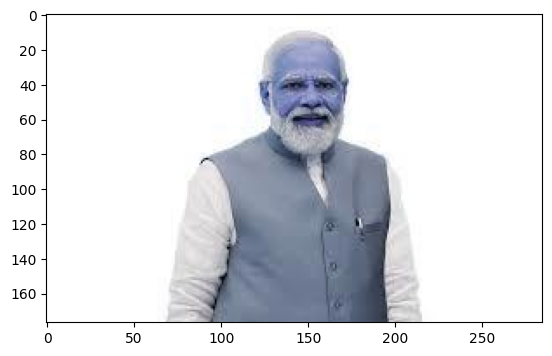

In [51]:
plt.imshow(img)

In [58]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

In [59]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


In [60]:
gray

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

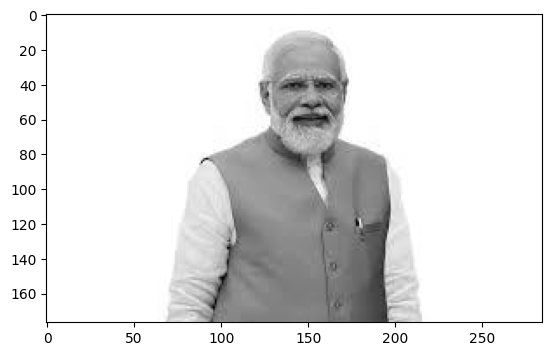

In [61]:
plt.imshow(gray, cmap= 'gray')

In [62]:
faces = face_cascade.detectMultiScale(gray,1.3,5)